In [17]:
import speech_recognition as sr
import pyaudio
import numpy as np


In [2]:
mic=sr.Microphone()
r=sr.Recognizer()

In [84]:
with mic as source:     # mention source it will be either Microphone or audio files.
    print("Speak Anything :")
    print(r.energy_threshold)
    r.adjust_for_ambient_noise(source) # For calibration purpose, it takes some time to listen our voice
    audio = r.listen(source,timeout=1, phrase_time_limit=10)  
    # listen to the source  audio = r.listen(source,timeout=1,phrase_time_limit=10)
    f1=open('Recorded.wav', 'wb')
    f1.write(audio.get_wav_data())
    f1.close()
    try:
        text = r.recognize_google(audio)    # use recognizer to convert our audio into text part.
        print("You said : {}".format(text))
        
    except:
        print("Sorry could not recognize your voice")   
        

Speak Anything :
4.0488677292553295
You said : what can I do for you


In [44]:
frequency_sampling, audio_signal = wavfile.read("Recorded.wav")

## we have to print out that audio file and analyze the spectrum. 

In [45]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')
print(frequency_sampling)


Signal shape: (153600,)
Signal Datatype: int16
Signal duration: 3.48 seconds
44100


In [55]:
audio_signal1 = audio_signal[:100]
audio_signal2=audio_signal[:1000]
audio_signal3=audio_signal[:10000]
audio_signal4=audio_signal[:100000]

In [64]:
time_axis1 = 1000 * np.arange(0, len(audio_signal1), 1) / float(frequency_sampling)
time_axis2 = 1000 * np.arange(0, len(audio_signal2), 1) / float(frequency_sampling)
time_axis3 = 1000 * np.arange(0, len(audio_signal3), 1) / float(frequency_sampling)
time_axis4 = 1000 * np.arange(0, len(audio_signal4), 1) / float(frequency_sampling)

In [65]:
print(len(time_axis3), len(audio_signal3))

10000 10000


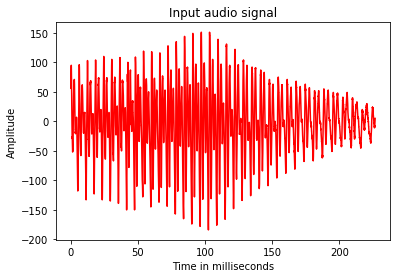

In [54]:
import matplotlib.pyplot as plt
ax=plt.figure()
plt.plot(time_axis, audio_signal1, 'r-')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
#plt.axis([0, 2, -1.5, 1.5])
plt.title('Input audio signal')
plt.show()

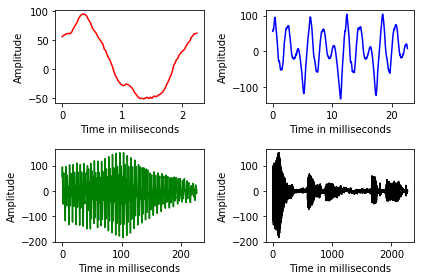

In [70]:
fig1, ((ax1, ax2), (ax3, ax4))=plt.subplots(2,2)
ax1.plot(time_axis1, audio_signal1, 'r-')
ax1.set_xlabel('Time in miliseconds')
ax1.set_ylabel('Amplitude')
ax2.plot(time_axis2, audio_signal2, 'b-')
ax2.set_xlabel('Time in milliseconds')
ax2.set_ylabel('Amplitude')
ax3.plot(time_axis3, audio_signal3, 'g-')
ax3.set_xlabel('Time in milliseconds')
ax3.set_ylabel('Amplitude')
ax4.plot(time_axis4, audio_signal4, 'k-')
ax4.set_xlabel('Time in milliseconds')
ax4.set_ylabel('Amplitude')
#fig1.suptitle('Distribution Speech Signal')
plt.tight_layout()
plt.show()

In [73]:
audio_signal2 = audio_signal2 / np.power(2, 15)
length_signal = len(audio_signal2)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)
signal_frequency = np.fft.fft(audio_signal2)
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2
len_fts = len(signal_frequency)
if length_signal % 2:
   signal_frequency[1:len_fts] *= 2
else:
   signal_frequency[1:len_fts-1] *= 2
signal_power = 10 * np.log10(signal_frequency)
x_axis = np.arange(0, half_length, 1) * (frequency_sampling / length_signal) / 1000.0

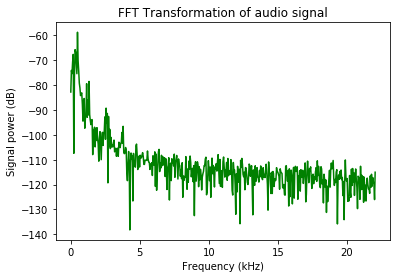

In [75]:
plt.figure()
plt.plot(x_axis, signal_power, color='green')
plt.title('FFT Transformation of audio signal')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()